# Classification

In [2]:
import pandas as pd
df_titanic = pd.read_csv("Titanic.csv")

In [3]:
df_titanic.isna().sum()

Unnamed: 0      0
Name            0
PClass          0
Age           557
Sex             0
Survived        0
SexCode         0
dtype: int64

## Echantillonnage

In [4]:
X = df_titanic[['PClass', 'Age', 'Sex']]
X

,PClass,Age,Sex
0,1st,29.00,female
1,1st,2.00,female
2,1st,30.00,male
3,1st,25.00,female
4,1st,0.92,male
...,...,...,...
1308,3rd,27.00,male
1309,3rd,26.00,male
1310,3rd,22.00,male
1311,3rd,24.00,male


In [5]:
X = pd.get_dummies(data = X, columns=['PClass', 'Sex'], drop_first=True)
X

,Age,PClass_2nd,PClass_3rd,Sex_male
0,29.00,False,False,False
1,2.00,False,False,False
2,30.00,False,False,True
3,25.00,False,False,False
4,0.92,False,False,True
...,...,...,...,...
1308,27.00,False,True,True
1309,26.00,False,True,True
1310,22.00,False,True,True
1311,24.00,False,True,True


In [6]:
y = df_titanic.Survived
y

0       1
1       0
2       0
3       0
4       1
       ..
1308    0
1309    0
1310    0
1311    0
1312    0
Name: Survived, Length: 1313, dtype: int64

In [7]:
y.size

1313

In [8]:
X.head()

,Age,PClass_2nd,PClass_3rd,Sex_male
0,29.00,False,False,False
1,2.00,False,False,False
2,30.00,False,False,True
3,25.00,False,False,False
4,0.92,False,False,True


In [9]:
y[:5]

0    1
1    0
2    0
3    0
4    1
Name: Survived, dtype: int64

In [10]:
y.value_counts(normalize=True)

Survived
0    0.657273
1    0.342727
Name: proportion, dtype: float64

## 1 - Arbre de decision

### 1 - getting the data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
# 30% for the test, and 70% for the training
# stratify is used to distribute the data equally to both the test and the trainig

In [12]:
print(X_train.shape)
X_train.head()

(919, 4)


,Age,PClass_2nd,PClass_3rd,Sex_male
33,41.0,False,False,True
924,24.0,False,True,True
1260,NaN,False,True,True
1125,NaN,False,True,True
404,NaN,True,False,False


In [13]:
print(X_test.shape)
X_test.head(5)

(394, 4)


,Age,PClass_2nd,PClass_3rd,Sex_male
961,21.0,False,True,False
1164,NaN,False,True,True
398,NaN,True,False,False
477,22.0,True,False,False
1291,51.0,False,True,True


In [14]:
print(y_train.shape)
y_train.head()

(919,)


33      0
924     0
1260    0
1125    1
404     1
Name: Survived, dtype: int64

In [15]:
print(y_test.shape)
y_test.head()

(394,)


961     0
1164    1
398     1
477     1
1291    0
Name: Survived, dtype: int64

### 2.1 - working with X_train

In [16]:
print(X_train.shape)
X_train.head()

(919, 4)


,Age,PClass_2nd,PClass_3rd,Sex_male
33,41.0,False,False,True
924,24.0,False,True,True
1260,NaN,False,True,True
1125,NaN,False,True,True
404,NaN,True,False,False


In [17]:
X_test.shape

(394, 4)

In [18]:
y_test.value_counts(normalize=True)
# the data is distributed equally

Survived
0    0.65736
1    0.34264
Name: proportion, dtype: float64

In [19]:
y_train.value_counts(normalize=True)
# the data is distributed equally

Survived
0    0.657236
1    0.342764
Name: proportion, dtype: float64

In [20]:
X_train.Age.isna().value_counts()

Age
False    527
True     392
Name: count, dtype: int64

In [21]:
mean = X_train.Age.mean()
mean

30.841707779886146

In [22]:
X_train.fillna(mean, inplace=True)

In [23]:
X_train.Age.isna().value_counts()

Age
False    919
Name: count, dtype: int64

In [24]:
std = X_train.Age.std()
std
# For example, if you have a dataset of exam scores with a mean score of 70 and a standard deviation of 10, 
# it suggests that most scores fall within the range of 60 to 80 (one standard deviation away from the mean in either direction), 
# and fewer scores are further away from this range.

10.637712411085221

#### *calculating 'centrer et raduire l'age'*

In [25]:
X_train['Age'] = (X_train['Age'] - mean) / std

In [26]:
X_train.Age.mean()

8.89144881527873e-17

In [27]:
print(X_train.shape)
X_train.head()

(919, 4)


,Age,PClass_2nd,PClass_3rd,Sex_male
33,0.954932,False,False,True
924,-0.643156,False,True,True
1260,0.000000,False,True,True
1125,0.000000,False,True,True
404,0.000000,True,False,False


### 2.2 - working with X_test

In [28]:
X_test.Age = X_test.Age.fillna(mean)

In [29]:
X_test['Age'] = (X_test['Age'] - mean) / std 

In [30]:
print(X_test.shape)
X_test.head()

(394, 4)


,Age,PClass_2nd,PClass_3rd,Sex_male
961,-0.925171,False,True,False
1164,0.000000,False,True,True
398,0.000000,True,False,False
477,-0.831166,True,False,False
1291,1.894984,False,True,True


### 3 - Decision Tree

#### 3.1 - Apprentissage

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [32]:
model_1 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=40, min_samples_split=80)
model_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=40, min_samples_split=80)

In [33]:
model_1.classes_

array([0, 1], dtype=int64)

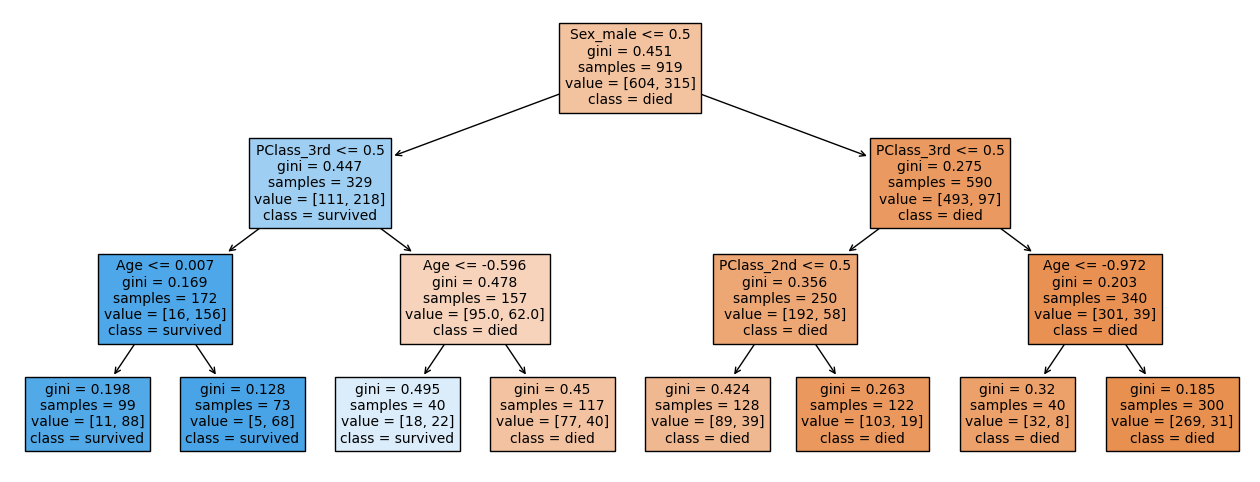

In [34]:
import matplotlib.pyplot as plt
cn = ['died', 'survived']

plt.figure(figsize=(16, 6))
plot_tree(model_1, feature_names=list(X.columns), filled = True, class_names=cn, fontsize=10)
plt.show()

#### 3.2 - Prediction

In [35]:
model_1.predict([[(75-mean)/std, 0, 1, 0]])

C:\Users\MYCOM\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [36]:
y_pred = model_1.predict(X_test)

In [37]:
print(y_pred.size)
y_pred

394


array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [38]:
print(X_test.iloc[1], "\n")
print("prediction: ", cn[y_pred[1]])

Age             0.0
PClass_2nd    False
PClass_3rd     True
Sex_male       True
Name: 1164, dtype: object 

prediction:  died


In [39]:
y_pred_proba = model_1.predict_proba(X_test)
y_pred_proba[0:10]

array([[0.45      , 0.55      ],
       [0.89666667, 0.10333333],
       [0.11111111, 0.88888889],
       [0.11111111, 0.88888889],
       [0.89666667, 0.10333333],
       [0.45      , 0.55      ],
       [0.89666667, 0.10333333],
       [0.06849315, 0.93150685],
       [0.6953125 , 0.3046875 ],
       [0.11111111, 0.88888889]])

#### 3.3 - Evalutaion de modele

In [40]:
from sklearn.metrics import confusion_matrix

mc = pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns = ['pred_died', 'pred_survived'],
                 index=['obs_died', 'obs_survived'])
mc

,pred_died,pred_survived
obs_died,237,22
obs_survived,54,81


##### calcule le taux de succes de model

In [41]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8071065989847716


In [42]:
print(accuracy_score(y_train, model_1.predict(X_train)))

0.8139281828073993


##### Cette approche consiste à calculer les métriques que d'une seule classe

In [43]:
from sklearn.metrics import recall_score, precision_score, f1_score
print('recall:', recall_score(y_test, y_pred, average='binary', pos_label = 0))
print('precision:', precision_score(y_test, y_pred, average='binary', pos_label = 0))
print('f1_score:', f1_score(y_test, y_pred, average='binary', pos_label = 0))

recall: 0.915057915057915
precision: 0.8144329896907216
f1_score: 0.8618181818181818


In [44]:
print('recall:', recall_score(y_test, y_pred, average='binary', pos_label = 1))
print('precision:', precision_score(y_test, y_pred, average='binary', pos_label = 1))
print('f1_score:', f1_score(y_test, y_pred, average='binary', pos_label = 1))

recall: 0.6
precision: 0.7864077669902912
f1_score: 0.680672268907563


## 2 - K-nearest-neighbor

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [73]:
y_pred = knn_model.predict(X_test)
print('f1 score:', str(f1_score(y_test, y_pred, average='binary', pos_label=1)))

f1 score: 0.723404255319149


In [74]:
from sklearn.metrics import confusion_matrix
# pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['pred_0', 'pred_1'], index=['obs_0', 'obs_1']).T #T bt3mln bl aakes
pd.crosstab(y_test, y_pred, colnames=['pred'], rownames=['obs'], margins=True)

pred,0,1,All
obs,,,
0,244,15,259
1,50,85,135
All,294,100,394


In [68]:
for i in range(1, 10):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    print(i, 'f1 1 score:', str(f1_score(y_test, y_pred, average='binary', pos_label=1)), '|| f1 0 score:', 
          str(f1_score(y_test, y_pred, average='binary', pos_label=0)))

1 f1 1 score: 0.6299212598425197 || f1 0 score: 0.8239700374531835
2 f1 1 score: 0.5538461538461539 || f1 0 score: 0.8532883642495784
3 f1 1 score: 0.7338709677419355 || f1 0 score: 0.8777777777777778
4 f1 1 score: 0.723404255319149 || f1 0 score: 0.8824593128390597
5 f1 1 score: 0.7468879668049793 || f1 0 score: 0.8884826325411335
6 f1 1 score: 0.7272727272727273 || f1 0 score: 0.8868940754039497
7 f1 1 score: 0.7226890756302521 || f1 0 score: 0.88
8 f1 1 score: 0.7217391304347827 || f1 0 score: 0.8853046594982079
9 f1 1 score: 0.71900826446281 || f1 0 score: 0.8754578754578755
